# Price elasticity

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#Import data file
df = pd.read_csv('supermarket.csv')
df

,Sales,Price.Eggs,Ad.Type,Price.Cookies
0,18,4.77,0,4.74
1,20,4.67,0,4.81
2,23,4.75,0,4.36
3,23,4.74,0,4.29
4,23,4.63,0,4.17
5,23,4.56,0,4.66
6,24,4.59,0,4.73
7,25,4.75,0,4.11
8,26,4.75,1,4.21
9,26,4.49,0,4.25


In [3]:
# view shape
df.shape

(30, 4)

In [4]:
#view dtypes
df.dtypes

Sales              int64
Price.Eggs       float64
Ad.Type            int64
Price.Cookies    float64
dtype: object

In [5]:
# list clomns
df.columns

Index(['Sales', 'Price.Eggs', 'Ad.Type', 'Price.Cookies'], dtype='object')

In [6]:
# drop Ad.Type
df = df.drop('Ad.Type', axis = 1 )

<AxesSubplot:>

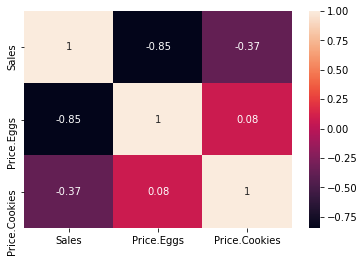

In [7]:
# corr heat map
sns.heatmap(df.corr(), annot = True)

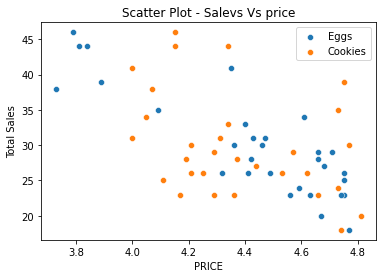

In [8]:
# scatter Plots

sns.scatterplot( x = 'Price.Eggs', y = 'Sales', data = df)
sns.scatterplot(x = 'Price.Cookies', y = "Sales", data = df)
plt.xlabel('PRICE')
plt.legend(labels = ['Eggs', 'Cookies'])
plt.ylabel('Total Sales')
plt.title('Scatter Plot - Salevs Vs price')
plt.show()

    Sales  Price
0      18   4.77
1      20   4.67
2      23   4.75
3      23   4.74
4      23   4.63
5      23   4.56
6      24   4.59
7      25   4.75
8      26   4.75
9      26   4.49
10     26   4.41
11     26   4.32
12     27   4.68
13     28   4.66
14     28   4.42
15     29   4.71
16     29   4.66
17     30   4.46
18     30   4.36
19     31   4.47
20     31   4.43
21     33   4.40
22     34   4.61
23     35   4.09
24     38   3.73
25     39   3.89
26     41   4.35
27     44   3.84
28     44   3.81
29     46   3.79
30     18   4.74
31     20   4.81
32     23   4.36
33     23   4.29
34     23   4.17
35     23   4.66
36     24   4.73
37     25   4.11
38     26   4.21
39     26   4.25
40     26   4.62
41     26   4.53
42     27   4.44
43     28   4.19
44     28   4.37
45     29   4.29
46     29   4.57
47     30   4.21
48     30   4.77
49     31   4.00
50     31   4.31
51     33   4.34
52     34   4.05
53     35   4.73
54     38   4.07
55     39   4.75
56     41   4.00
57     44   4.

C:\Users\dmuwa\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


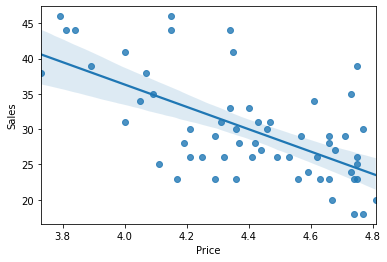

In [23]:
# RegPlot 

A = df[['Sales', 'Price.Eggs']]
A.rename(columns = {'Price.Eggs': 'Price'}, inplace = True)
B = df[['Sales', 'Price.Cookies']]
B.rename(columns ={ 'Price.Cookies': 'Price'}, inplace = True)
C = A.append(B, ignore_index = True)
print(C)

sns.regplot(x = "Price", y = "Sales", data = C, fit_reg = True)
plt.show()

## Linear Regression

In [9]:
# define predictors and Target
X = df[['Price.Eggs', 'Price.Cookies']]
y = df.Sales

In [10]:
# define model
model = LinearRegression()

In [11]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45 )

In [12]:
# fit model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# view coeff
model.coef_

array([-18.1545846 ,  -9.81191721])

In [14]:
# view intercept
model.intercept_

153.1096519651795

In [15]:
# model score
LinearRegression.score(model, X,y)

0.8134109112613949

In [16]:
# predict from x_test
y_pred = model.predict(X_test)
y_pred

array([23.66882611, 42.6765907 , 35.88171115, 24.60121202, 27.39735465,
       29.894919  ])

In [17]:
# error = Y - Y_pred
# calculate mean squared error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('mean_squared _error is {}' .format(mean_squared_error(y_test, y_pred)))


# calculate root mean squared error

print('root_mean_squared _error is {}' .format(np.sqrt(mean_squared_error(y_test, y_pred))))

# calculate mean absolute error

print('mean_absolute _error is {}' .format(mean_absolute_error(y_test, y_pred)))

mean_squared _error is 9.665667985427007
root_mean_squared _error is 3.108965742079994
mean_absolute _error is 2.6452747341273573
